# Lession 5a: Plotting with Pandas

The Python visualization ecosystem is vast and can come across as daunting at first. In fact, [PyViz](https://pyviz.org/index.html) is a website that was created for the sole purpose of helping users decide on the best open-source Python data visualization tools for their needs. I highly recommend you take some time to explore the resource.

However, since we have spent the last several modules getting comfortable using Pandas for our statistical computing needs, it is only fitting to continue using Pandas and explore the high-level plotting capabilities it provides before exploring other libraries.  Consequently, this lesson is mainly focused on making you capable of creating basic plots directly with your Pandas Series and DataFrame objects.

## Learning objectives

By the end of this lesson you will be able to:

* Create univariate plots based on Series
* Create bivariate plots based on DataFrames

## Prerequisites

Load Pandas to provide you access to the join functions we’ll cover in this lesson.

In [1]:
import pandas as pd

This lesson will also use the Complete Journey data; but before we start we’ll join the transactions data with the products and household demographics data:

In [2]:
from completejourney_py import get_data

cj_data = get_data()
df = (
    cj_data['transactions']
    .merge(cj_data['products'], how='inner', on='product_id')
    .merge(cj_data['demographics'], how='inner', on='household_id')
)

df.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,product_category,product_type,package_size,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,31541475196,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,900,330,31672350129,1095275,1,0.25,0.25,0.0,0.0,5,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
3,900,330,31883555076,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
4,900,330,31944515097,1095275,1,0.50,0.00,0.0,0.0,8,...,ROLLS,ROLLS: BAGELS,4 OZ,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0


## The `.plot` attribute

Both Pandas Series and DataFrames have a `.plot` attribute that allow us to plot our data. This `.plot` attribute is a little unique as you can call it as a method and specify the plot of interest using an argument:

```python
df.plot(kind='scatter', ...)
```

Or you can use it to access sub-methods:

```python
df.plot.scatter(...)
```

```{note}
In this lesson and throughoug most of this class you will notice that I prefer to use `.plot` to access sub-methods. However, this is simply a preference as you can accomplish the same output with either approach.
```

`.plot` is pretty versatile as it (and all the sub-methods) provide a lot of parameters to control and refine our plots. Currently, the available plots that we can make with `.plot` include:

* __line__ : line plot (default)
* __bar__ : vertical bar plot
* __barh__ : horizontal bar plot
* __hist__ : histogram
* __box__ : boxplot
* __kde__ : Kernel Density Estimation plot
* __density__ : same as ‘kde’
* __area__ : area plot
* __pie__ : pie plot
* __scatter__ : scatter plot (DataFrame only)
* __hexbin__ : hexbin plot (DataFrame only)

### Knowledge check

```{admonition} Questions:
:class: attention
Check out the `.plot` documentation for [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) and [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

1. What parameter would you use to control the figure size?
2. What parameter would you use to add a title?
3. What parameter(s) would you use to log scale an x and/or y axis?
```

## Plotting a Series

Often, our analysis starts by understanding individual variables within our data and analyzing univariate distributions helps with this process. Consequently, its very common to simply select a single Series and visualize the distribution of values in that series. 

Let's start by creating a histogram of the transaction `sales_value`s in our Complete Journey data. We can do this with `hist()`:

<AxesSubplot:ylabel='Frequency'>

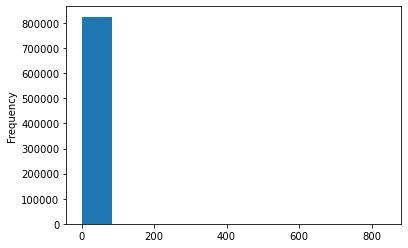

In [3]:
df['sales_value'].plot.hist()

You probably notice a couple of things above:

1. What's with the `<AxesSubplot:ylabel='Frequency'>` output above our plot?
2. We have many zeroes in our data plus this feature is heavily skewed. Consequently, our histogram is not very informative at this point.

When we make a plot, the output will include the name of the object, which is what we see happening with `<AxesSubplot:ylabel='Frequency'>`. 

```{tip}
 We can remove this output by adding a `;` after the plotting function call.
```

As for #2, we can make some adjustments such as remove any zero dollar transactions, log transform our axis, and increase the number of bins. This helps to pull out additional insights in our `sales_value` distribution. For example, we see we have a lot of very low dollar transactions and the frequency decreases as the transaction dollar amount increases. However, we also see an increase in transactions right at the \$200 mark but that decreases quickly. There are also a few outlier transaction values that are around the \$600 and \$800 value marks.

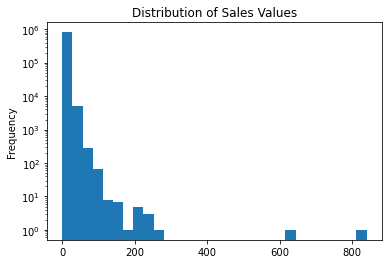

In [4]:
(
    df.loc[df['sales_value'] > 0, 'sales_value']
    .plot.hist(log=True, bins=30, title='Distribution of Sales Values')
);

Box plots and kernel density estimation (KDE) plots are an alternative way to view univariate distribtions. For example, let's compute the total `sales_value` across all stores. The resulting `sales_by_store` object is a Series. A boxplot provides a lot of information (read about them [here](https://www.simplypsychology.org/boxplots.html#:~:text=In%20descriptive%20statistics%2C%20a%20box,(or%20percentiles)%20and%20averages.)). We can see that the median (red line) is around $10^2 = 100$ and the interquartile range is between somewhere around 50-15000. We also see we have some outliers on the upper end.

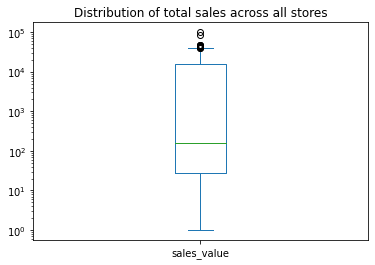

In [5]:
sales_by_store = df.groupby('store_id')['sales_value'].sum()

# boxplot
sales_by_store.plot.box(logy=True, title='Distribution of total sales across all stores');

We can quickly compare our boxplot with our numeric distribution and we see our they are similar (median: 157, interquartile range: 27-16000).

In [6]:
sales_by_store.describe()

count      280.000000
mean      9374.588536
std      15141.356992
min          1.000000
25%         27.265000
50%        156.740000
75%      16167.215000
max      99608.720000
Name: sales_value, dtype: float64

The KDE plot (which is also produced with `.plot.density()`) provides a smoothed histogram.

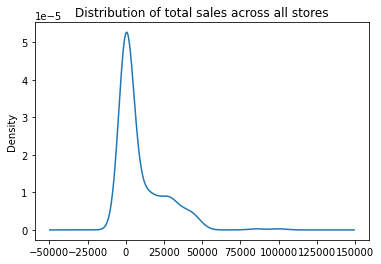

In [7]:
sales_by_store.plot.kde(title='Distribution of total sales across all stores');

The `.plot` sub-methods work exceptionally well with time series data. To illustrate, let's create a Series that contains the `sales_value` of each transaction with the `transaction_timestamp` as the index.

In [8]:
sales = df.set_index('transaction_timestamp')['sales_value']
sales.head()

transaction_timestamp
2017-01-01 11:53:26    0.50
2017-01-23 12:50:57    0.25
2017-01-29 12:25:17    0.25
2017-02-13 10:56:45    0.50
2017-02-19 12:11:58    0.50
Name: sales_value, dtype: float64

A handy method we have not talked about is [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html) which allows us to easily convert time series data. For example, if we wanted to sum all `sales_value`s by the hour we can use `.resample('H')` followed by `.sum()`.

In [9]:
sales.resample('H').sum()

transaction_timestamp
2017-01-01 11:00:00      0.50
2017-01-01 12:00:00     13.69
2017-01-01 13:00:00     20.43
2017-01-01 14:00:00     36.58
2017-01-01 15:00:00    553.79
                        ...  
2018-01-01 00:00:00    337.78
2018-01-01 01:00:00    221.50
2018-01-01 02:00:00    142.84
2018-01-01 03:00:00     63.56
2018-01-01 04:00:00     10.52
Freq: H, Name: sales_value, Length: 8754, dtype: float64

If we followed this sequence of code with `plot.line()` we get a line plot of the total sales values on the y-axis and the date-time on the x-axis.

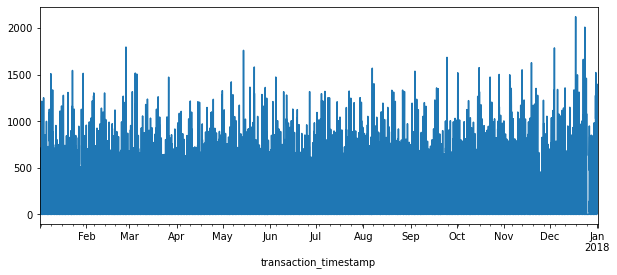

In [10]:
(
    sales
    .resample('H')
    .sum()
    .plot.line(figsize=(10,4))
);

The above plot is a bit busy since we're plotting values for every hour over the course of a year. Let's reduce the frequency and, instead, sum the `sales_value`s by day (`.resample('D')`). Now we see a bit more of a descriptive pattern. It looks like there is routinely higher sales transactions on particular days (probably certain days of the week such as weekends).

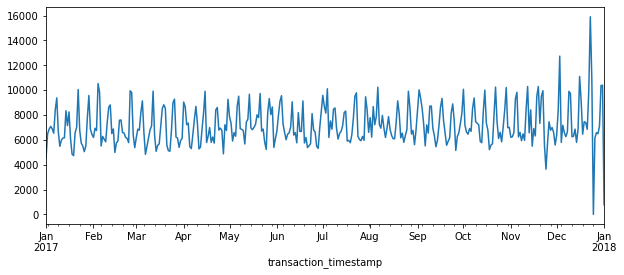

In [11]:
(
    sales
    .resample('D')
    .sum()
    .plot.line(figsize=(10,4))
);

Let's validate our assumption above regarding the weekly shopping pattern. The below code chunk performs the same as above where we compute total daily sales across all days of the year but then we follow that up by extracting the name of the weekday from the date-timestamp and then grouping  by the day of week and computing the median and interquartile range (IQR) for all daily sales for the year.

```{note}
If you have not yet seen code that looks like `lambda idx: idx.day_name()` do not worry. These are called lambda (anonymous) functions and we'll discuss them more in module 6.
```

We definitely see that Saturday and Sunday are the weekdays with the heaviest sales value transactions.

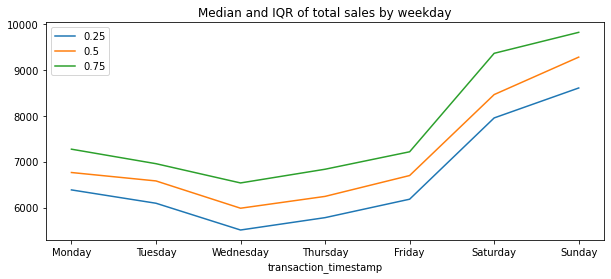

In [12]:
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_sales_by_weekday = (
    sales
    .resample('D')                        # resample by day
    .sum()                                # compute total daily sales
    .rename(lambda idx: idx.day_name())   # extract week day name from date-timestamp
    .groupby('transaction_timestamp')     # group by day of week
    .quantile([.25, .5, .75])             # compute median and IQR of sales values
    .unstack()                            # flatten output (results in a DataFrame)
    .reindex(day_order)                   # force index to follow weekday order         
)

total_sales_by_weekday.plot.line(title='Median and IQR of total sales by weekday', figsize=(10,4));

Another common plot for Series is the bar plot. Let's look at the median values from the analysis above. If we peak at the result we see we have a Series that contains the median total sales values for each weekday.

In [13]:
median_sales_by_weekday = total_sales_by_weekday[0.50]
median_sales_by_weekday

transaction_timestamp
Monday       6764.620
Tuesday      6581.320
Wednesday    5987.355
Thursday     6244.785
Friday       6698.905
Saturday     8461.210
Sunday       9276.320
Name: 0.5, dtype: float64

Rather than plot this as a line chart as we did above, we can use `.plot.bar()` to create a bar plot:

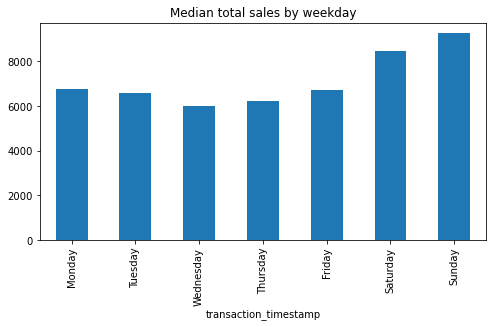

In [14]:
median_sales_by_weekday.plot.bar(title='Median total sales by weekday', figsize=(8,4));

A common pattern you'll use is to follow a `.value_counts()` method call with a bar plot. For example, say we want to assess the number of transactions in our data by department. We could easily get this with the following:

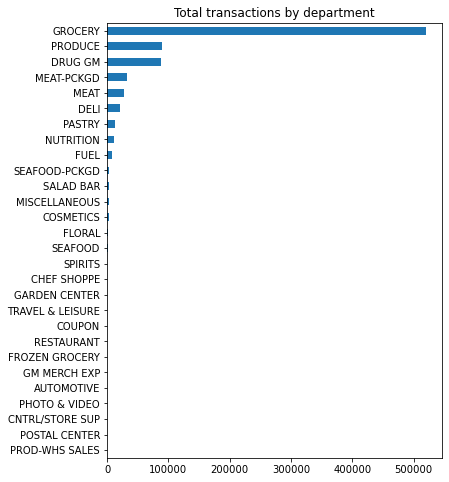

In [15]:
(
    df['department']
    .value_counts(ascending=True)
    .plot.barh(title='Total transactions by department', figsize=(6,8))
);

Unfortunately, we see a lot of very small values that overcrowds the plot. We can make some small adjustments to our code to leave all department values for those departments in the top 10 as is but for all departments not in the top 10 we can condense them down to an 'Other' category.

```{note}
We will discuss the [`.where()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) in module 6. For now just realize its a way to apply an if-else condition to a Series.
```

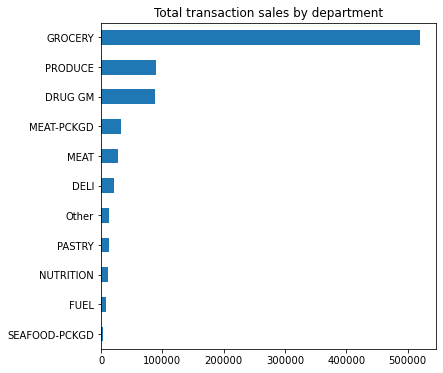

In [16]:
top10 = df['department'].value_counts().index[:10]
isin_top10 = df['department'].isin(top10)

(
    df['department']
    .where(isin_top10, 'Other')
    .value_counts(ascending=True)
    .plot.barh(title='Total transaction sales by department', figsize=(6,6))
);

```{admonition} Knowledge check
:class: attention
1. Create a histogram for the `quantity` column. Remove any zero quantities and/or adjust the axis to make the plot more informative.
2. Compute the sum of `quantity` for each `store_id`. Now create density plot and box plot. Compare these plots to the summary statistics provided by `.describe()`.
3. Use `.resample()` to compute the sum of `quantity` for each day. Plot the results to assess if there is similar pattern as we saw with `sales_value`.
4. Use a bar plot to plot the total transaction quantities by `department`. Are the results similar to what we saw with total `sales_value` by department?
```

## Plotting a DataFrame

Once we understand the basics of `.plot` with a Series we can extend this to a DataFrame easily. The primary difference is that the `.plot` sub-methods for a DataFrame allow us to plot multiple variables at once (i.e. `x` and `y`) and there are a few plotting methods that work for DataFrames that are not available for Series (i.e. `.scatterplot`, `.hexbin`)

For example, say we want to plot `sales_value` vs `quantity` across all transactions. The main difference we see below is that we specify which variables in our DataFrame to plot with `x` and `y`.

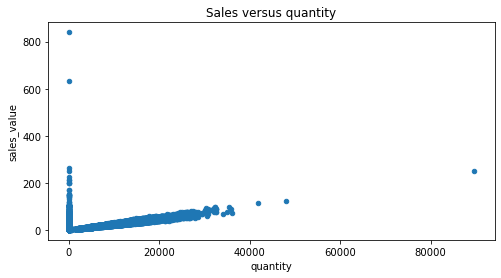

In [17]:
df.plot.scatter(x='quantity', y='sales_value', title='Sales versus quantity', figsize=(8,4));

It's important to point out that although we used a few plots that are usually considered univariate in the Series section (i.e. `.plot.hist`, `.plot.bar`), we can still use these same methods with DataFrames. For example, say we wanted to compute the sum of `sales_value` at the department level but we want the output to be a DataFrame (which is very common).

In [18]:
dept_sales = (
    df
    .groupby('department', as_index=False)
    .agg({'sales_value': 'sum'})
    .nlargest(10, 'sales_value')
    .reset_index(drop=True)
)

dept_sales

,department,sales_value
0,GROCERY,1310385.28
1,DRUG GM,337458.00
2,FUEL,210337.18
3,PRODUCE,193993.90
4,MEAT,169014.96
5,MEAT-PCKGD,120369.80
6,DELI,86380.11
7,MISCELLANEOUS,46790.04
8,PASTRY,38328.18
9,NUTRITION,35779.51


We can still plot the results by assigning the columns of interest to the `x` and `y` parameters in `.plot.barh`.

```{note}
It's common to use `.sort_values` just before bar plots to adjust the order of the bars.
```

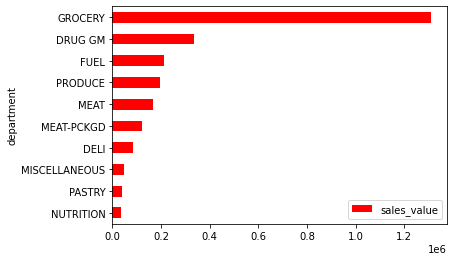

In [19]:
(
    dept_sales
    .sort_values('sales_value')
    .plot.barh(x='department', y='sales_value', color='red')
);

A great advantage of the `.plot` methods is that they allow us to easily plot more than one column of interest. For example, say we compute the total 
 for the given departments.

In [20]:
dept_totals = (
    df
    .query("department != 'FUEL' & department != 'MISCELLANEOUS'")
    .groupby('department', as_index=False)
    .agg({'sales_value': 'sum', 'quantity': 'sum'})
    .nlargest(10, 'sales_value')
    .reset_index(drop=True)
)

dept_totals

,department,sales_value,quantity
0,GROCERY,1310385.28,693486
1,DRUG GM,337458.00,111003
2,PRODUCE,193993.90,111279
3,MEAT,169014.96,36421
4,MEAT-PCKGD,120369.80,43233
5,DELI,86380.11,22048
6,PASTRY,38328.18,16601
7,NUTRITION,35779.51,15188
8,SEAFOOD-PCKGD,18996.37,4207
9,FLORAL,12494.58,1798


We can actually plot both the `sales_value` and `quantity` columns in the same bar plot by passing a list to `y`:

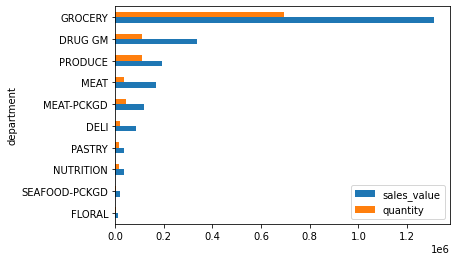

In [21]:
(
    dept_totals
    .sort_values('sales_value')
    .plot.barh(x='department', y=['sales_value', 'quantity'])
    .legend(loc='lower right')
);

This feature is especially handy when plotting multiple line charts. For example, say we have daily totals computed for each of the discount variables:

In [22]:
total_daily_discounts = (
    df
    .query("department == 'GROCERY'")
    .set_index('transaction_timestamp')
    .loc[:, ['retail_disc', 'coupon_disc', 'coupon_match_disc']]
    .resample('D')
    .sum()
)

total_daily_discounts.head()

,retail_disc,coupon_disc,coupon_match_disc
transaction_timestamp,,,
2017-01-01,495.69,4.45,1.45
2017-01-02,613.58,4.15,2.15
2017-01-03,601.23,8.95,3.75
2017-01-04,712.03,3.85,1.85
2017-01-05,724.14,14.60,3.09


If we apply `.plot.line()` to this DataFrame then by default it will plot each of the numeric variables on the same plot.

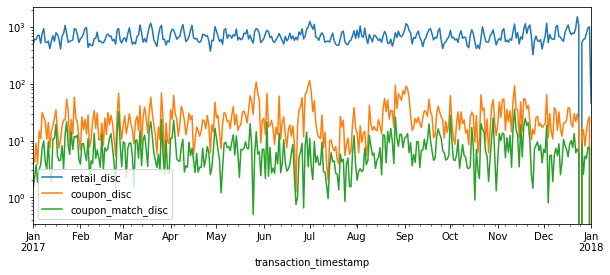

In [23]:
total_daily_discounts.plot.line(logy=True, figsize=(10, 4));

In fact, this same logic applies to many of the univariate plots such as histograms, denisty plots, box plots, etc.

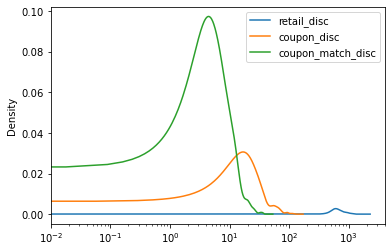

In [24]:
total_daily_discounts.plot.kde(logx=True);

```{admonition} Knowledge check
:class: attention
1. Compute the average `sales_value` and `quantity` by `household_id`. Create a density plot that plots both these columns.
2. Use a bar plot to assess whether married versus unmarried customers produce more transactions. Now do the same to assess which age groups produce the most transactions.
3. Use `.resample()` to compute the sum of `quantity` and `sales_value` for each month. Plot the results to assess which months have the largest `quantity` and `sales_value`s.
```

## Under the hood - Matplotlib

Underneath the hood Pandas is using [Matplotlib](https://matplotlib.org/) to create the plots. Matplotlib is the most tried-and-true, mature plotting library in Python; however, its a bit more difficult to digest Matplotlib which is why I first introduce plotting with Pandas.

In the next lesson we will dig into Matplotlib because, with it being the most popular plotting library in the Python ecosystem, it is important for you to have a baseline understanding of its capabilities.  But one thing I want to point out here is, since Pandas builds plots based on Matplotlib, we can actually use Matplotlib in conjunction with Pandas to advance our plots.

For example, Matplotlib provides many [style options](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be used to beautify our plots. If you are familiar with [fivethirtyeight.com](https://fivethirtyeight.com/) you'll know that most of their visualizations have a consistent theme. We can use Matplotlib to change the style of our plots to look like fivethirtyeight plots.

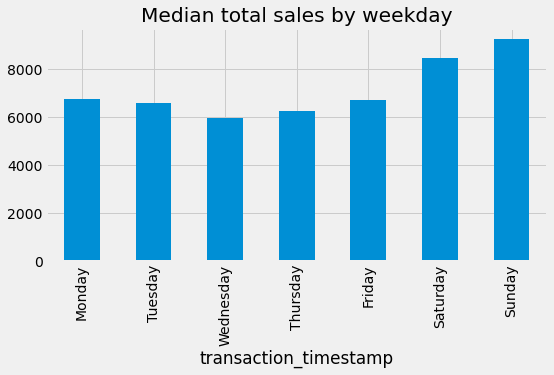

In [25]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

median_sales_by_weekday.plot.bar(title='Median total sales by weekday', figsize=(8,4));

We may also want to refine our tick marks so that they are formatted in the units of interest. For example, below we use Matplotlib's ticker module to format our y-axis to be in dollar and comma formatted units:

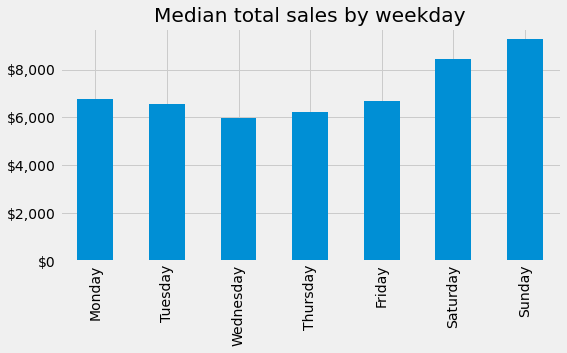

In [26]:
import matplotlib.ticker as mtick

tick_format = mtick.StrMethodFormatter('${x:,.0f}')

(
    median_sales_by_weekday
    .plot.bar(title='Median total sales by weekday', xlabel='', figsize=(8,4))
    .yaxis.set_major_formatter(tick_format)
);

We'll explore more Matplotlib capabilities in the next lesson but for now, happy Pandas plotting!

## Exercises

```{admonition} Questions:
:class: attention
1. Identify all different products that contain “pizza” in their `product_type` description.
2. Use a bar plot to assess whether married versus unmarried customers purchase more pizza products.
3. Create a scatter plot to assess the `quantity` versus `sales_value` of pizza products sold.
4. Use `.resample` to compute the total `quantity` of pizza `product_type`s for each day of the year. Plot the results to assess if there is a pattern.
```

## Computing environment

In [27]:
%load_ext watermark
%watermark -v -p jupyterlab,pandas,completejourney_py,matplotlib

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

jupyterlab        : 3.3.2
pandas            : 1.4.2
completejourney_py: 0.0.3
matplotlib        : 3.5.1

